# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: GERALDINO, Simon Paul Andrew M.\
_Student No._: 2020-11068\
_Section_: THX-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: SIMON PAUL ANDREW M. GERALDINO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [ ]:
import numpy as np
from numpy.linalg import eigh

# We create the array A that was given
A = np.array([[8, -2, -20],
             [-2, -3, -9],
             [-20, -9, -3]], float)
# a is the array for eigenvalues and x is the array for eigenvectors
# We use the "eigh" function because the array A is seen to be symmetric.
(a,x) = eigh(A)

# We can now print the eigenvalues and the eigenvectors we get from the eigh function
print("The eigenvalues are: \n" + str(a))
print("And the eigenvectors are: \n" +str(x))

The eigenvalues are: 
[-21.99606195   0.16021522  23.83584674]
And the eigenvectors are: 
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


In [ ]:
# Now, to check if AV = VD

# We create an array D, which is a diagonal matrix, with the values of the eigenvalues from array a
D = np.array([[a[0], 0, 0],
              [0, a[1], 0],
              [0, 0, a[2]]], float)

# By using the matmul function in numpy, we can multiply two matrices to get AV and VD
AV = np.matmul(A, x)
VD = np.matmul(x, D)

# Check if the difference between these two values will be zero, to see if they are equivalent with each other
print(AV - VD)

[[ 1.77635684e-15  5.96744876e-16  0.00000000e+00]
 [-1.77635684e-15 -1.05471187e-15  1.33226763e-15]
 [ 3.55271368e-15 -4.37150316e-16  8.88178420e-15]]


The value we get from getting the difference between AV and VD is not specifically 0. However, we can say that the difference is insignificant enough to say that essentially proving that the relationship of multiplying the eigenvalues and the eigenvectors arrays (matrices) and the eigenvector matrix and the diagonal matrix of the eigenvalues holds true.

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [ ]:
from math import exp

# This is the "assumption" value at the start
x = 1

# We are going to use this "arbitrarily" set value for the error. This will be changed later on.
error = 1

# This has been set as the standard of accuracy
acc = 1e-6

# This is the given value of c
c = 2

print("Solution to x: \t\tAccuracy:")

# This while statement loops every time the condition set is not yet true
while error > acc:

  # We are setting this variable as the "true value" of x
  x_star = x

  # This is the equation given in the problem
  x = 1 - exp(-c*x)

  # We changing the value of error to the absolute value of the difference between the "true value" and the assumption for x. This is the accuracy of the solution.
  error = abs(x - x_star)

# Prints out the value of x and the accurac
print(str(x) + "\t" + str(error))

Solution to x: 		Accuracy:
0.7968126311118457	7.319848429609976e-07


In [ ]:
# We will create an array from 0 to 3, with increments 0.01
c = np.arange(0,3,0.01)

# Creating an empty array that will be used later for containing x values
x_arr = []

# This for loop is to be used in getting the x values for every c value
for i in np.arange(len(c)):

  # This is the "assumption" value at the start
  x = 1

  # We are going to use this "arbitrarily" set value for the error. This will be changed later on.
  error = 1

  # This has been set as the standard of accuracy
  acc = 1e-6

  # This while statement loops every time the condition set is not yet true
  while error > acc:

    # We are setting this variable as the "true value" of x
    x_star = x

    # This is the equation given in the problem
    x = 1 - exp(-c[i]*x)

    # We changing the value of error to the absolute value of the difference between the "true value" and the assumption for x. This is the accuracy of the solution.
    error = abs(x - x_star)

  # We are adding all instances of x that have passed the condition set in the while loop
  x_arr = np.append(x_arr, x)

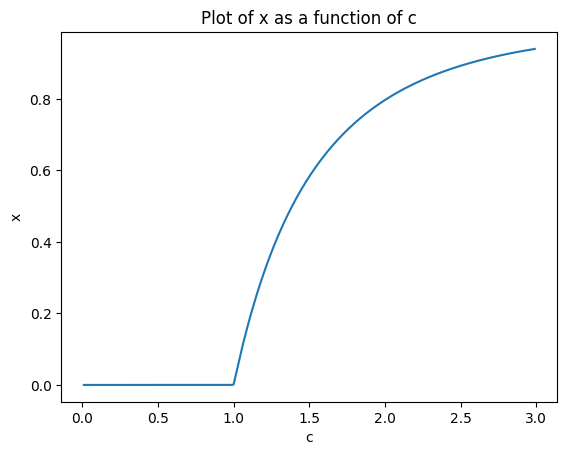

In [ ]:
import matplotlib.pyplot as plt

# This is used for creating figures and axes
fig,ax = plt.subplots()

# We can now create a graph using the values of c and its corresponding values of x
ax.plot(c[1:],x_arr[1:])
ax.set(title = 'Plot of x as a function of c',
       ylabel = 'x',
       xlabel = 'c')

# This is to show the graph
plt.show()

The graph shown above is the plot of x as a function of c. From observing this plot, we can see that the values of c, from 0 to 1, does not change the value of x. The next values of c, from 1 to 3, shows a logarithmic progression of increase in the value of x. Another observation we can see is that the value of x (when c = 2) from Problem 2.1 seems to be reflected in the graph.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [ ]:
# These are the values of the constants (which were provided)
Gconst = 6.674e-11  # Gravitational constant
M_earth = 5.974e24  # Mass of Earth
M_moon = 7.348e22   # Mass of Moon
R_moon = 3.844e8    # Distance of moon from Earth
omega = 2.662e-6    # Angular velocity of the Moon

# This defines the function of r in getting the L_1 Lagrange point
def f(r):
  return Gconst*M_earth/r**2 - Gconst*M_moon/(R_moon - r)**2 - omega**2*r

# This defines the function of r, which is the "hand-solved" derivative of the f(r)
def df(r):
  return -2*Gconst*M_earth/r**3 - 2*Gconst*M_moon/(R_moon - r)**3 - omega**2

# We are setting this as the initial value of x
x_star = 3e8

# This for loop is used to create multiple instances of x_star to get to the more accurate answer (for every instance of i)
for i in range(10):

  # This is the Newton's method way of getting L_1
  x_star = x_star - f(x_star)/df(x_star)

# This prints out x_star, which is the distance of L_1 from Earth
print("The distance of L_1 from Earth is " + str(x_star) + " meters")

The distance of L_1 from Earth is 326045071.66535544 m


After looking at the multiple values of x_star per instance of i, we can observe that it takes less number of loops to get to a significantly accurate answer.